# Research Notebook 3
## your name here: Javier Humberto Arana Zelaya
## Date: March 10, 2025

# 1: Experience
## Describe at least one research activity you worked on this week. 

Your text here

- I have been learning and implmenting the usage of the ordinary matter Equation of state (EoS) which i will later define. This is because and EoS is needed for the ordinary matter in the two fluid case of the Tolman–Oppenheimer–Volkoff equations.  

- I have been converting units to matach the units of the EoS in ordinary matter and in dark matter, and from this I divide by a epsilon_o which is a rescaling factor to rescale the EoS to dimensionless units from natrual units of pressure. e_o can be also used to rescale a dimensionless EoS and or soultuions of the Tolman–Oppenheimer–Volkoff to natrual units and then use other conversion factors to obtain solar masses for mass and kilometer for radius.

- I have solved the Tolman–Oppenheimer–Volkoff equations in the two fluid dimesnionless case for the dark matter and ordinary matter, and have obtained a variaty of solutions for the various star massses and radiuses for varying initial dark matter pressures and varing initial  ordinary matter pressures.

## Motivation:

Your text here

The projects motivation is that we can get signals from accreting darkstars via wiens law from the tremendaus heating up of the ideal gas particle of say a hydrogen atom, and will heat up to a certin temperture when it reaches the surface bondary of the star which are predominatly gamma ray emission, and for the dark star (one fluid) the hydrogen atoms falling in the dark star will heat up even more due to the gravitational potential still being in effect but not fully as the enclosed mass decreseas with decreasing radius.

In the evolution of the darkstars life in for example traveling through an intersteller cloud of dust particles will begin to accrete ordinary matter and in doing so will need to reach a stable limit per say and create finally a ultra-compact neutron star with bosonic dark matter. both the begining and the end of these compact objects will exhibit gamma radiation either constant or periodically depeneding on the accretion procces the compact object decides to take, but in either case the matter will be superheated to emit gamma radiation. 


# 2: What? (What happened?)
## Describe what happened during your activities for the week.

Your text here

I will show my code in the code cell bellow this one and above three, this code is for the solved Tolman–Oppenheimer–Volkoff equation in the two fluid case for a boson mass of 1GeV (mb=1GeV). I will also show the Equation of State I used Below as well as it is important for the Tolman–Oppenheimer–Volkoff equation in the two fluid case. and I will as well show the 5 equations I used for the two fluid case in detail to outline what I have done , And I will show the dimensionfull and dimensonless Equation of States so it is clear.  


The equations in my f function are the Tolman–Oppenheimer–Volkoff equations for two fluid case of both dark matter and ordinary matter, and the Equation of State I will show has dimensions, the one being used for dark matter is:$$\epsilon_{DM}=\epsilon_o(\frac{p_{DM}}{\epsilon_o})^{2/n} + \frac{n+2}{n-2}p_{DM}$$,then there is the dimensionless case for the dark matter Equation of State which is: $$\epsilon_{DM}^{'}=(\frac{p_{DM}}{\epsilon_o})^{2/n} + \frac{n+2}{n-2} (\frac{p_{DM}}{\epsilon_o})$$. After this there is the ordinary matter Equation of State with dimensions:$$\epsilon_{OM}=\frac{1}{\Gamma - 1} p_{OM} +(\mu_o n_o - \frac{\Gamma}{\Gamma - 1} p_o) (\frac{p_{OM}}{p_o})^{\frac{1}{\Gamma}}$$, then there is the ordinary matter equation of State in the dimensonless case:$$\epsilon_{OM}^{'}=\frac{1}{\Gamma - 1} (\frac{p_{OM}}{\epsilon_o}) + (\frac{1}{\epsilon_o}) (\mu_o n_o - \frac{\Gamma}{\Gamma - 1} p_o) (\frac{p_{OM}}{p_o})^{\frac{1}{\Gamma}}$$, and note that $$\epsilon_o=mb^4 \rightarrow mb=1GeV \rightarrow \epsilon_o=1GeV^4$$  then is the change of the dark matter pressure with respect to change radius $$\frac{dp_{OM}}{dr}=-(p_{OM}+\epsilon_{OM})\frac{d\nu}{dr}$$, and the change of the ordinary matter pressure with respect to change radius $$\frac{dp_{DM}}{dr}=-(p_{DM}+\epsilon_{DM})\frac{d\nu}{dr}$$ where the metric funtion is: $$\frac{d\nu}{dr}=\frac{(m_{OM}+m_{DM}) + 4\pi r^3 (p_{OM} + p_{DM})}{r(r-2(m_{OM}+m_{DM}))}$$, then is the change in the dark matter mass with respect to the change radius $$\frac{dm_{OM}}{dr}=4 \pi r^2 \epsilon_{OM}$$, and finally the change in ordinary mass with respect to the change in radius  $$\frac{dm_{DM}}{dr}=4 \pi r^2 \epsilon_{DM}$$






/var/folders/8j/v4r8zvxx3mj45652xkb87c880000gn/T/ipykernel_88785/2029982506.py:39: RuntimeWarning: invalid value encountered in scalar power
  return  (p/e_o1)**(2 / n) + ((n + 2) / (n - 2)) * (p/e_o1)


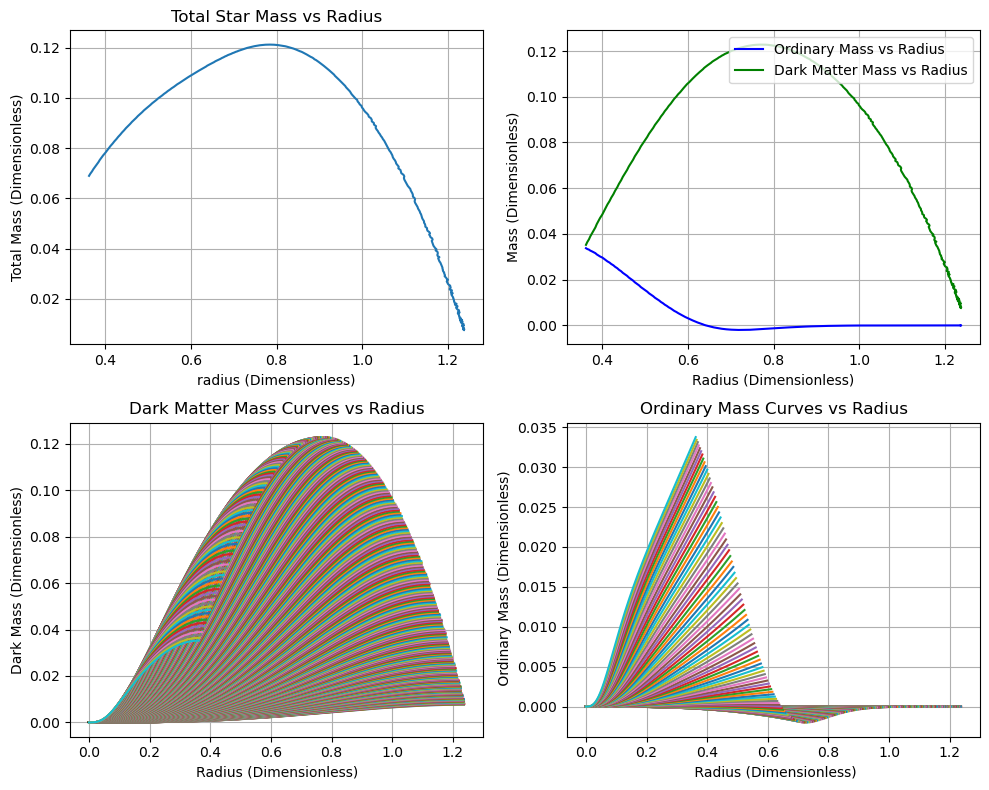

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define constants 
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

masslist_DM = []
masslist_OM = []
radiuslist = []

mb=1 #in GeV
e_o = mb**4 
n1 = 4     # index
m0_DM = 0  # initial DM mass
m0_OM = 0  # initial OM mass
R_span = [1e-5, 10]  # Distance
#p0_DM_array = np.linspace(10, 1e3, 5000)
#p0_OM_array = np.linspace(10, 1e3, 5000)

p0_DM_array = np.logspace(-5, 0, 400)
p0_OM_array = np.logspace(-14, 0, 400)

gamma = 1.024
mu1=1.653
mu = mu1 * 1e-3 #in GeV
n_sat = 0.16  #units of fm^-3
n01 = 5.9 * n_sat
n02 = n01 * (197.33)**3
n0 = n02 * (1/1000)**3 #in GeV^3
#n0 = 1.352359062e-3   #in GeV^3
p01 = 455.3 
p02 = p01 * (197.33)**3 
p0_reg = p02 * (1/1000)**4  #in GeV^4
#p0_reg = 1.641272134e-5  #in GeV^4

# Energy density as a function of pressure (Given from Paper)
def e_density_DM(p, e_o1, n):
    return  (p/e_o1)**(2 / n) + ((n + 2) / (n - 2)) * (p/e_o1)

def e_density_OM(p, gamma, n0, mu):
    return ((gamma/(gamma - 1)) * p + (mu * n0 - (gamma/(gamma - 1)) * p0_reg) * (p / p0_reg)**(1 / gamma))/e_o

# ODE system
def f(r, y):
    p_DM, p_OM, m_OM, m_DM = y

    e_DM = e_density_DM(p_DM, e_o, n1)  # compute energy Dark Matter density
    e_OM = e_density_OM(p_OM, gamma, n0, mu)

    if p_DM <= 0 or p_OM <= 0 or r <= 0 :  # avoid singularities
        return [0, 0, 0, 0]

    L = r - 2 * (m_DM + m_OM)

    if L <= 0:
        return [0, 0, 0, 0]  #return zero if denominator is invalid

    # pressure gradient (dpdr) from TOV 2 fluid case 
    dpdr_OM = -(e_OM + p_OM) * (((m_DM + m_OM) + 4 * np.pi * (r**3) * (p_DM + p_OM)) / (r * L))
    dpdr_DM = -(e_DM + p_DM) * (((m_DM + m_OM) + 4 * np.pi * (r**3) * (p_DM + p_OM)) / (r * L))

    # Mass gradient (dmdr)
    dmdr_DM = 4 * np.pi * (r**2) * e_DM
    dmdr_OM = 4 * np.pi * (r**2) * e_OM
    return [dpdr_DM, dpdr_OM, dmdr_OM, dmdr_DM]

# stop integration when pressure becomes negligible
def p0_DM_equals_zero(r, y):
    p_DM, _, _, _ = y  # Only use p_DM to stop
    return p_DM  # Stop when p_DM drops below 1e-6

def p0_OM_equals_zero(r, y):
    _, p_OM, _, _ = y  # Only use p_OM to stop
    return p_OM   # Stop when p_OM drops below 1e-6

# set the event to stop when pressure becomes negligible
p0_DM_equals_zero.terminal = True
p0_DM_equals_zero.direction = -1

p0_OM_equals_zero.terminal = True
p0_OM_equals_zero.direction = -1
 

for p0_DM, p0_OM in zip(p0_DM_array,p0_OM_array):
    IntCon = [p0_DM, p0_OM, m0_OM, m0_DM]  # Initial conditions 

    # Solve the ODE
    solutionsRel = solve_ivp(
        f,
        R_span,
        IntCon,
        method='RK45',
        t_eval=np.linspace(R_span[0], R_span[1], 10000),
        events=[p0_DM_equals_zero, p0_OM_equals_zero],  # List of event functions
        dense_output=True,
        rtol=1e-6,
        atol=1e-8
    )

    # Check if integration was successful
    if solutionsRel.success:
        # Extract results
        radius_OM = solutionsRel.t
        mass_OM = solutionsRel.y[2] 
        mass_DM = solutionsRel.y[3]  

        masslist_OM.append(mass_OM[-1])
        masslist_DM.append(mass_DM[-1])
        index = len(mass_OM) - 1
        radiuslist.append(radius_OM[index])
        axs[1, 1].plot(radius_OM, mass_OM)
        axs[1, 0].plot(radius_OM, mass_DM)

r_array=np.array(radiuslist)
m_OM=np.array(masslist_OM)
m_DM=np.array(masslist_DM)
mass_tot=m_OM+m_DM

# Set plot titles, labels, and grid
axs[1, 1].set_title("Ordinary Mass Curves vs Radius")
axs[1, 1].set_xlabel(" Radius (Dimensionless)")
axs[1, 1].set_ylabel(" Ordinary Mass (Dimensionless)")
axs[1, 1].grid()

# Plot Final Star Mass vs Initial Pressure
axs[0, 0].plot(r_array, mass_tot)
axs[0, 0].set_title("Total Star Mass vs Radius")
axs[0, 0].set_xlabel("radius (Dimensionless)")
axs[0, 0].set_ylabel("Total Mass (Dimensionless)")
axs[0, 0].grid()

# Plot ordinary mass, dark matter mass, and initial pressure
line1, = axs[0, 1].plot(radiuslist, masslist_OM, 'b-', label="Ordinary Mass vs Radius")
line3, = axs[0, 1].plot(radiuslist, masslist_DM, 'g-', label="Dark Matter Mass vs Radius")  # Third curve
axs[0, 1].set_xlabel("Radius (Dimensionless)")
axs[0, 1].set_ylabel("Mass (Dimensionless)")
axs[0, 1].grid()


# Add legend to axs[0, 1]
lines = [line1, line3]  # Include all three lines
labels = [line.get_label() for line in lines]
axs[0, 1].legend(lines, labels, loc="upper right")

# Plot Final Star Radius vs Mass
axs[1, 0].set_title("Dark Matter Mass Curves vs Radius")
axs[1, 0].set_xlabel("Radius (Dimensionless)")
axs[1, 0].set_ylabel("Dark Mass (Dimensionless)")
axs[1, 0].grid()

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

# 3: So what? (What does it mean?)
## Describe your results

Your text here

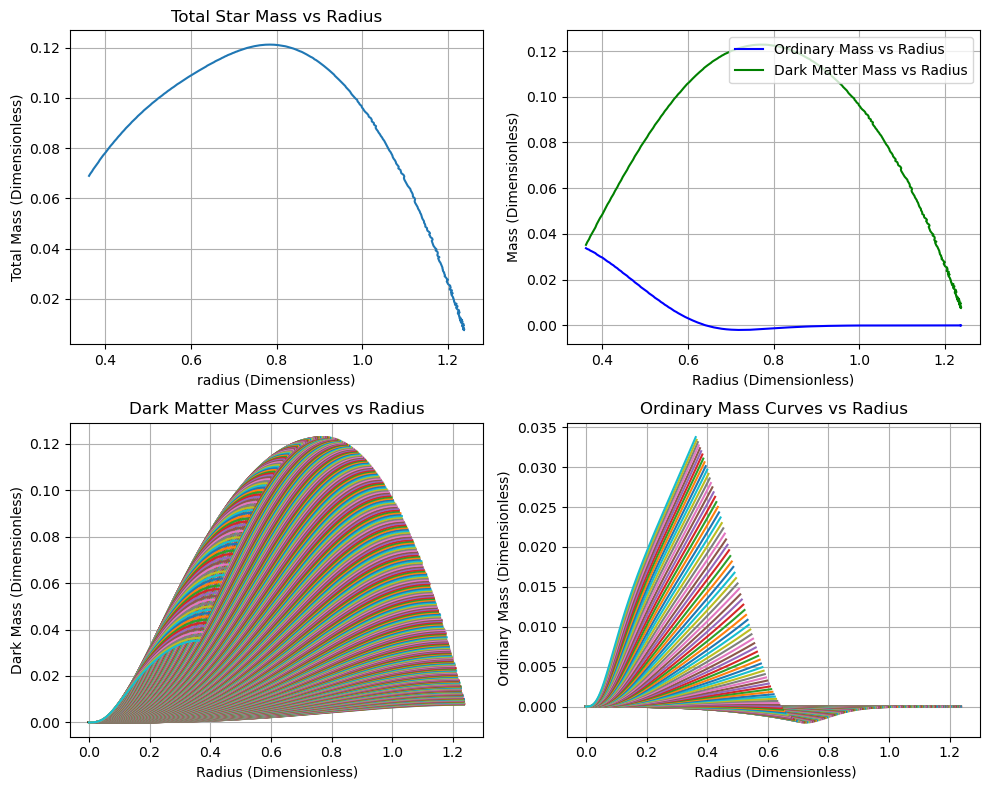
*Figure 1.0: Mass vs Radius curves for ordinary matter, dark matter, and total matter*

for the bottom right plot in Figure 1.0, it is showing the various mass radius curves for the ordinary matter, what is needed from these curves is the last value of each curve as it containes what the 'ultra-compact neutron star with bosonic dark matter' ordinary mass mass and radius value wil be since that is when the pressure is calculated to be zero and so integration stops and now the last value of the curve is the final ordinary mass with coressponding radius. Note that the multiple curves ae due to the array of initial ordinary matter pressures

for the bottom left plot in Figure 1.0, it is showing the various mass radius curves for the dark matter, what is needed from these curves is the last value of each curve as it containes what the 'ultra-compact neutron star with bosonic dark matter dark matter' dark matter mass and radius value will be since that is when the pressure is calculated to be zero and so integration stops and now the last value of the curve is the final dark matter mass with coressponding radius. Note that the multiple curves ae due to the array of initial dark matter pressures

for the top right plot in Figure 1.0 it is showing curves that describe the various star masses as a funtion of their corresponding radiuses, the green is for the dark matter mass values and the ordinary matter mass values is the blue curve.

the top right plot in Figure 1.0 is the addition of both ordinary matter and dark matter arrays, so the total mass of the stars as a function of radiuses

  

# 4. Now what? (What's next?)
## Plan for the next week

Your text here

The plan for next week is to convert the solutions from dimensionless units to dimensionfull units in natrual units and then make the mass into solar masses and radius into kilometers. Also what is needed is to apply the changing gravitational potential via the metric funtion onto the hydrogen atom to see how much more it heats up while falling into the dark matter star towards its center and see the corresponging wavelength emission via wiens law. Also me and my group are going to start preparing the outline of the final presentation to split up parts and then complete our own sections while working togther on a google slides presentation.    

# 5. Bibliography

Your references here

[1] Sarah L. Pitz and J. Schaffner-Bielich, *Generating ultra-compact neutron stars with bosonic dark matter*, 12, arXiv preprint, 2024, arXiv:2408.13157 [astro-ph.HE]

[2] Schaffner-Bielich, Jürgen. Compact Star Physics. Cambridge: Cambridge University Press, 2020. Print.